In [6]:
# Folium, especializada en mapas(?), es una appi (?)
#comando para instalar folium:  conda install conda-forge::folium


In [58]:
import folium as fl 
import numpy as np
import matplotlib.pyplot as plt


In [9]:
mis_coordenadas = [19.323754590818595, -99.17912408286806]
mapa = fl.Map(location = mis_coordenadas, zoom_start=25)  #haz un mapa centrado en esa ubicación con un zoom 
fl.Marker(mis_coordenadas, popup='aquitoy').add_to(mapa)  #crea una marca en el mapa con la ubicación 
mapa.save('salon.html')     #guarda el mapa para abrirlo en el navegador

In [28]:
#MEJOR FORMA DE EXTRAER DATOS

#mis_datos = np.genfromtxt('recorrido.csv', delimiter = ',', dtype = float, encoding=None)  #es necesario cambiarlo a float para poder usarlo 
#como matrices. Revisar qué hace genfromtxt, genera un array de los datos 
#t = mis_datos[1:,0]  #path es ubicación del archivo
#lat = mis_datos[1:,1]
#long = mis_datos [1:,2]

In [62]:
# Otra forma de definir las variables 

mis_datos = np.genfromtxt('recorrido.csv', delimiter = ',', dtype = float, encoding=None)  #es necesario cambiarlo a float para poder usarlo 
#como matrices. Revisar qué hace genfromtxt, genera un array de los datos 
t = mis_datos[1:,0]  #path es ubicación del archivo
lat_long = mis_datos[1:,1:3]   #es hasta 3, porque ignora el último 
mi_mapa= fl.Map(location = lat_long[1050], zoom_start=12) #Solo acepta un punto, crea el mapa
trayectoria = fl.PolyLine(locations = lat_long, weight=5)    #acá sí marca varios puntos (sobre el mapa anteriormente creado)
trayectoria.add_to(mi_mapa)  #acá se puede ahorrar una linea pegando ésta a la anterior, así 
#trayectoria = fl.PolyLine(locations = lat_long, weight=5).add_to(mi_mapa) 

fl.Marker(location=lat_long[0],popup='Start',icon=fl.Icon(color='green')).add_to(mi_mapa)
fl.Marker(location=lat_long[-1],popup='Start',icon=fl.Icon(color='red')).add_to(mi_mapa)
mi_mapa.save('caminoindios.htmp')
#https://htmlcolorcodes.com/  colorcitos
#display(mi_mapa)  #otra forma de visualizarlo con otra librería de python 

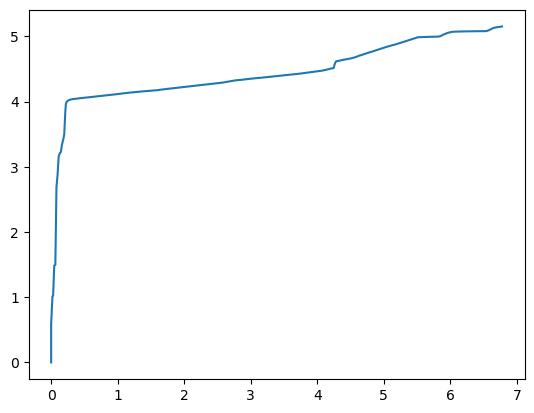

In [63]:
# cambio de coordenadas de GPS a cartesianas  ZZZZzz
RT = 6371e3
lat = np.deg2rad(lat_long[:,0])
long = np.deg2rad(lat_long[:,1])
altura = mis_datos[1:,3]
x= (RT+altura)*np.cos(lat)*np.sin(long)
y=(RT+altura)*np.cos(lat)*np.cos(long)
z=(RT+altura)*np.sin(lat)
distancia = np.zeros_like(t)
for i in range (len(t)-1):
    distancia[i+1]= distancia[i]+np.sqrt((x[i+1]-x[i])**2+(y[i+1]-y[i])**2+(z[i+1]-z[i])**2)
plt.plot(t/60,distancia/1000)
plt.show()

#hay algo mal acá.